This is a test notebook for trying out some of the features without using the real data.

In [1]:
%matplotlib inline

In [4]:
import pandas as pd

In [29]:
from kegg_coloring.cuffdiff_output import CuffdiffOutput
from kegg_coloring.david_results import read_david_res
from kegg_coloring.pathway_scheme import PathwayImg
from kegg_coloring.utils import dict_to_df

Load a cuffdiff output file (in this case it's randomly generated and has no 'locus' column).

In [13]:
cfdf_output = CuffdiffOutput(pd.read_csv('data/cuffdiff_test.csv'))

In [10]:
cfdf_output = cfdf_output.select_significant_by_samples('s1', 's2')

In [12]:
cfdf_output.shape

(91, 13)

In [15]:
cfdf_output.head()

,test_id,gene_id,gene,sample_1,sample_2,status,value_1,value_2,log2(fold_change),test_stat,p_value,q_value,significant
0,XLOC_000018,XLOC_000018,Ppp1r8,s1,s2,OK,15.428900,24.266500,0.653331,2.31224,0.00130,0.042333,yes
1,XLOC_000073,XLOC_000073,BC002163,s1,s2,OK,1.947960,0.040786,-5.577760,-4.86973,0.00095,0.033265,yes
2,XLOC_000101,XLOC_000101,Sdf2l1,s1,s2,OK,0.427335,2.261320,2.403730,3.86709,0.00005,0.003035,yes
3,XLOC_000108,XLOC_000108,Nptn,s1,s2,OK,257.488000,521.516000,1.018210,2.31497,0.00130,0.042333,yes
4,XLOC_000134,XLOC_000134,Hdac3,s1,s2,OK,2.114330,4.655840,1.138840,2.87919,0.00010,0.005529,yes


Load results from DAVID functional annotation chart tool.

Unfortunately, there's no way to get this for large gene lists through DAVID API.

In [17]:
david_res = read_david_res('data/david_kegg_test.txt')

In [18]:
david_res.shape

(5, 13)

In [21]:
david_res.head()

,Category,Term,Count,%,PValue,Genes,List Total,Pop Hits,Pop Total,Fold Enrichment,Bonferroni,Benjamini,FDR
0,KEGG_PATHWAY,mmu04141:Protein processing in endoplasmic ret...,4,4.705882,0.034265,"PLAA, SEC24A, TRAM1, DNAJA2",34,168,7720,5.406162,0.921546,0.921546,30.506150
1,KEGG_PATHWAY,mmu01100:Metabolic pathways,11,12.941176,0.036035,"QRSL1, PLD3, PIGK, RPE, PLD1, TALDO1, EPHX2, I...",34,1278,7720,1.954340,0.931375,0.738037,31.823661
2,KEGG_PATHWAY,mmu01230:Biosynthesis of amino acids,3,3.529412,0.043487,"RPE, TALDO1, GAPDH",34,78,7720,8.733032,0.961056,0.661043,37.128643
3,KEGG_PATHWAY,mmu01200:Carbon metabolism,3,3.529412,0.087446,"RPE, TALDO1, GAPDH",34,116,7720,5.872211,0.998744,0.811758,61.524805
4,KEGG_PATHWAY,mmu04010:MAPK signaling pathway,4,4.705882,0.092400,"PPM1B, FGF1, DUSP7, CDC25B",34,253,7720,3.589863,0.999156,0.757196,63.650109


In [20]:
david_res.list_pathways()

,kegg_id,term
0,mmu04141,Protein processing in endoplasmic reticulum
1,mmu01100,Metabolic pathways
2,mmu01230,Biosynthesis of amino acids
3,mmu01200,Carbon metabolism
4,mmu04010,MAPK signaling pathway


Graph the proportion between expected and observed number of genes in each pathway.

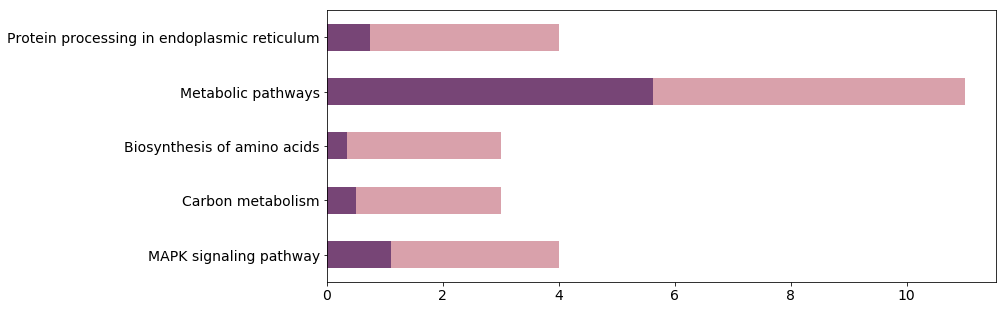

In [22]:
david_res.plot_expected_vs_observed()
# TODO add a legend and a title

In [26]:
def get_colored_picture(cuffdiff, david, pathway_name):
    kegg_id = david.get_pathway_id_by_name(pathway_name)
    genes = david.gene_list_for_pathway(kegg_id)
    gene_expr = cuffdiff.gene_expression_dict_by_name(genes)
    pathway_img = PathwayImg(kegg_id)
    
    for gene, expr in gene_expr.items():
        color = cuffdiff.scaled_palette().get_color(expr)
        pathway_img.color_gene(gene, color)
    print(dict_to_df(gene_expr))
    return pathway_img.picture_from_pixs()

Download pathway image from KEGG and color pertinent gene boxes. Blue(ish) if a gene is downregulated and red(dish) if it's upregulated.

      key       val
0    Plaa -1.824710
1  Dnaja2  0.691481
2   Tram1 -1.570290
3  Sec24a  0.796681


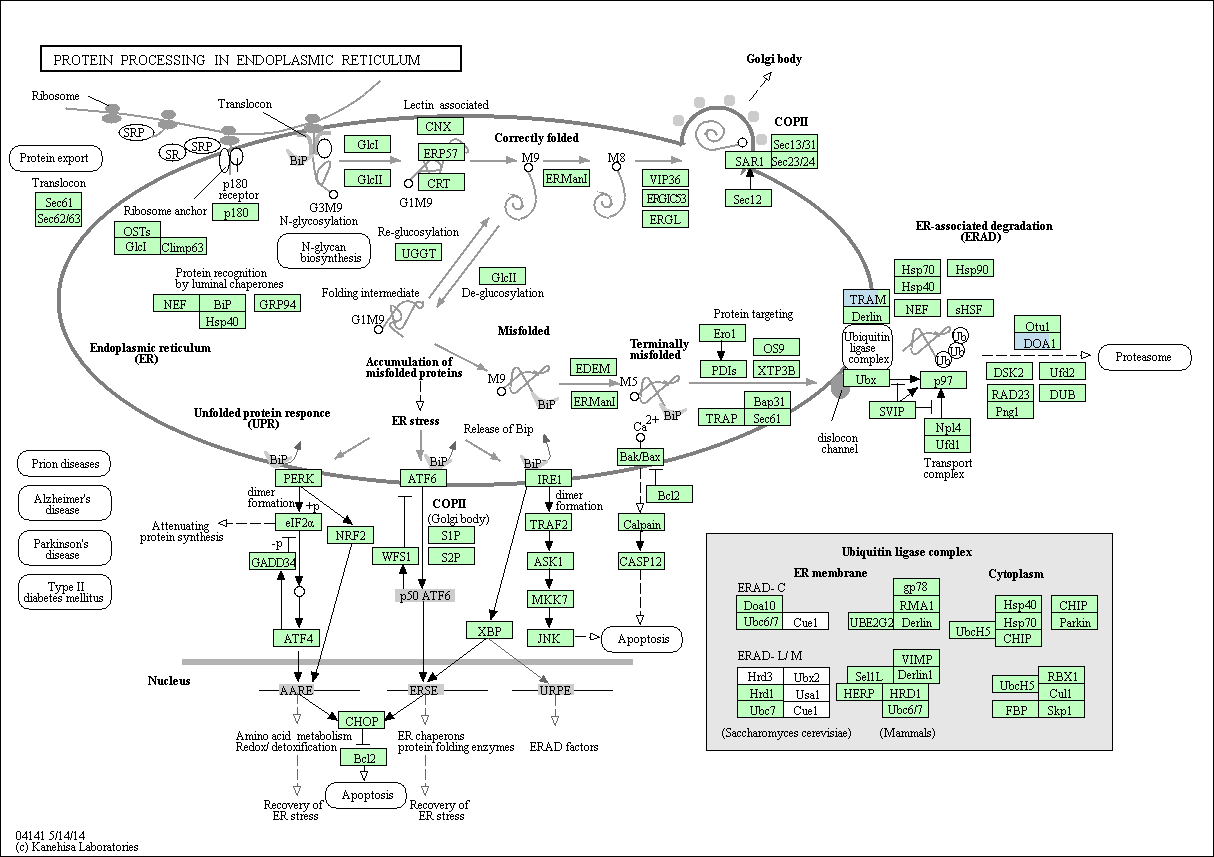

In [31]:
get_colored_picture(cfdf_output, david_res, 'Protein processing in endoplasmic reticulum')

      key       val
0   Dusp7 -1.253190
1  Cdc25b  1.042660
2    Fgf1 -1.044440
3   Ppm1b      -inf


/home/zlira/.virtualenvs/kegg_coloring/lib/python3.6/site-packages/kegg_coloring-0.1-py3.6.egg/kegg_coloring/utils.py:17: RuntimeWarning: invalid value encountered in double_scalars
  return np.ceil(np.abs(r)) * (np.abs(r) / r).astype(int)


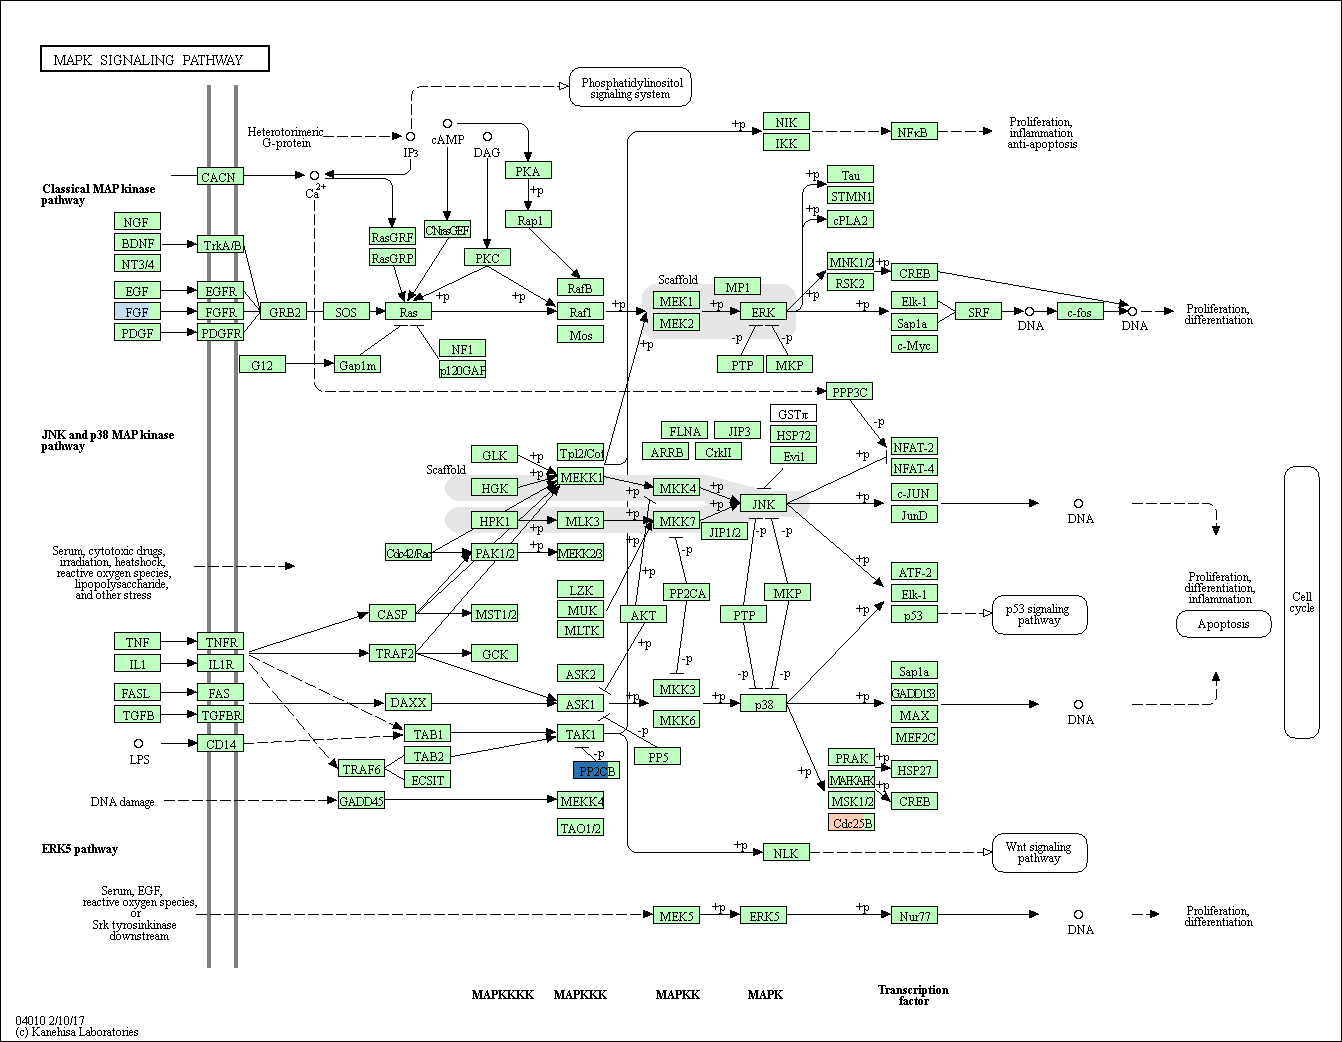

In [32]:
get_colored_picture(cfdf_output, david_res, 'MAPK signaling pathway')